In [ ]:
# COMP 551, Fall 2024, McGill University
# Assignment 1 (Classificaiton)
# Rob Li, Ian McFarland, Finnley Howald
# 30 September 2024

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve

In [ ]:
%pip install ucimlrepo

In [ ]:
#### Task 1: Acquire, preprocess, and analyze the data

In [ ]:
### 1.1. Load the datasets into NumPy or Pandas objects in Python.
from ucimlrepo import fetch_ucirepo

In [ ]:
# Dataset 2: CDC Diabetes Health Indicators
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets['Diabetes_binary']
# metadata
print(cdc_diabetes_health_indicators.metadata)
# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [ ]:
# viewing the datasets
print("Dataset:\n", X)
print("Targets:\n", y)

Dataset:
         HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0            1         1          1   40       1       0   
1            0         0          0   25       1       0   
2            1         1          1   28       0       0   
3            1         0          1   27       0       0   
4            1         1          1   24       0       0   
...        ...       ...        ...  ...     ...     ...   
253675       1         1          1   45       0       0   
253676       1         1          1   18       0       0   
253677       0         0          1   28       0       0   
253678       1         0          1   23       0       0   
253679       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                          0             0       0        1  ...   
1                          0             1       0        0  ...   
2                          0             0       1        0  ... 

In [ ]:
### 1.2. Prepare the dataset, including handle categorical features, null values (if any), scale features, etc. For this step, you may use pandas, numpy, and scalers from sklearn.preprocessing.
X_prepared = X
print("Prepared Dataset:\n", X_prepared.head())


Prepared Dataset:
    HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             0       0        1  ...              1            0        5   
1             1       0        0  ...              0            1        3   
2             0       1        0  ...              1            1        5   
3             1       1        1  ...              1            0        2   
4             1       1        1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Educat

In [ ]:
## Handling categorical values
# As stated in the dataset variable descriptions, Age, Income, and Education are recorded with Numerical Categories or 1-13, 1-8, 1-6 respectively
# We could do one hot coding for these values.......
# Or, since they are already ordinal we will leave the categories as be

In [ ]:
## Handling null values
# Count rows with any null values
null_rows_count = X_prepared.isnull().any(axis=1).sum()
print(f"Number of rows with any null value: {null_rows_count}")
# No missing values!

Number of rows with any null value: 0


In [ ]:
# Scaling numerical values pt.1
# Summary statistics for numerical features
numerical_stats = X_prepared.describe()
print("Summary Statistics for Numerical Features:\n", numerical_stats)

Summary Statistics for Numerical Features:
               HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.0

In [ ]:
# TODO: Disregard all females in datasets as it doesn't count any of them as having diabetes.......

In [ ]:
## Scaling numerical values pt.2
# Scale the features to between [0, 1], see if this makes a difference?
# From our analysis of the summary of numerical features of the data above
numerical_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth'] # numerical data (expect Age Education Income which are numerical categories)

print("Scaled Dataset:\n", X_prepared.head())

Scaled Dataset:
    HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             0       0        1  ...              1            0        5   
1             1       0        0  ...              0            1        3   
2             0       1        0  ...              1            1        5   
3             1       1        1  ...              1            0        2   
4             1       1        1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Educatio

In [ ]:
## Final check
# Check for any null values
null_rows_count = X_prepared.isnull().any(axis=1).sum()
print(f"Number of rows with any null value: {null_rows_count}")
# Print data set head
print("Prepared Dataset:\n", X_prepared.head())

Number of rows with any null value: 0
Prepared Dataset:
    HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             0       0        1  ...              1            0        5   
1             1       0        0  ...              0            1        3   
2             0       1        0  ...              1            1        5   
3             1       1        1  ...              1            0        2   
4             1       1        1  ...              1            0        2   

   MentHlth

In [ ]:
### 1.3. Compute basic statistics on the data to understand it better

# Check if the dataset is balanced or imbanced by calculating the distribution of the target variable.
print("Instances in each class:\n", y.value_counts())
print("\nPercentage of instances in each class:\n", y.value_counts(normalize=True) * 100)
# So we have a slight Class imbalance

Instances in each class:
 Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64

Percentage of instances in each class:
 Diabetes_binary
0    86.066698
1    13.933302
Name: proportion, dtype: float64


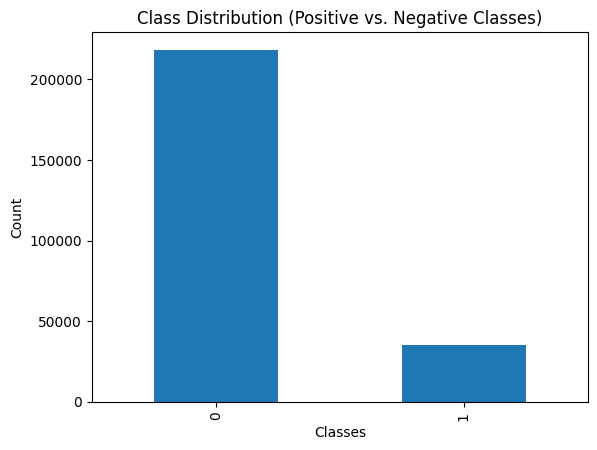

In [ ]:
# Class imbalance As plot
y.value_counts().plot(kind='bar')
plt.title('Class Distribution (Positive vs. Negative Classes)')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

# Clearly not balanced

In [ ]:
# Summary statistics for numerical features
numerical_stats = X_prepared.describe()
print("Summary Statistics for Numerical Features:\n", numerical_stats)

Summary Statistics for Numerical Features:
               HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.0

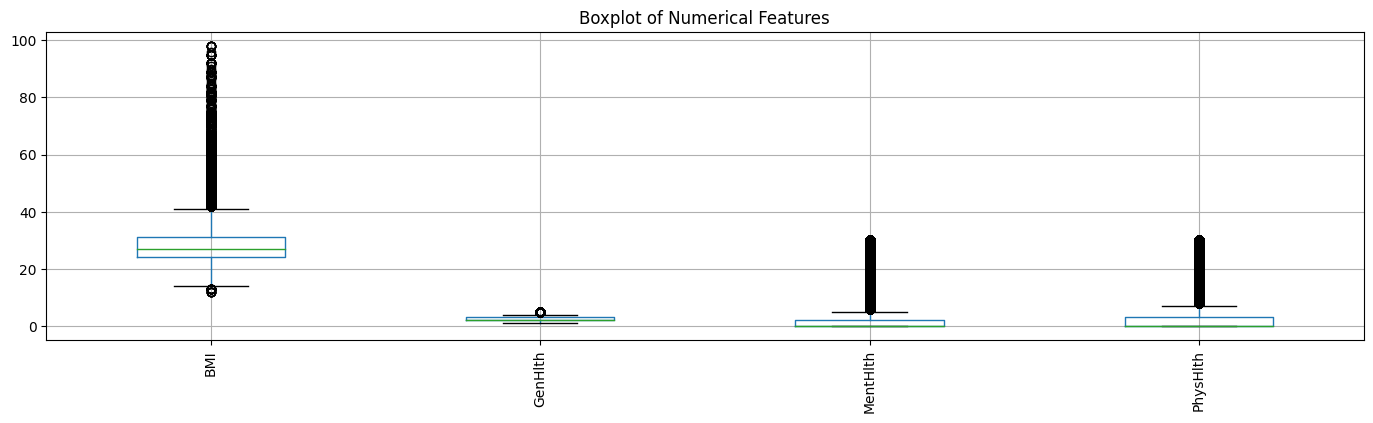

In [ ]:
# Boxplot for numerical features
numerical_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth'] # numerical data (expect Age Education Income which are numerical categories)
X_prepared[numerical_columns].boxplot(figsize=(17, 4))
plt.xticks(rotation=90)
plt.title('Boxplot of Numerical Features')
plt.show()

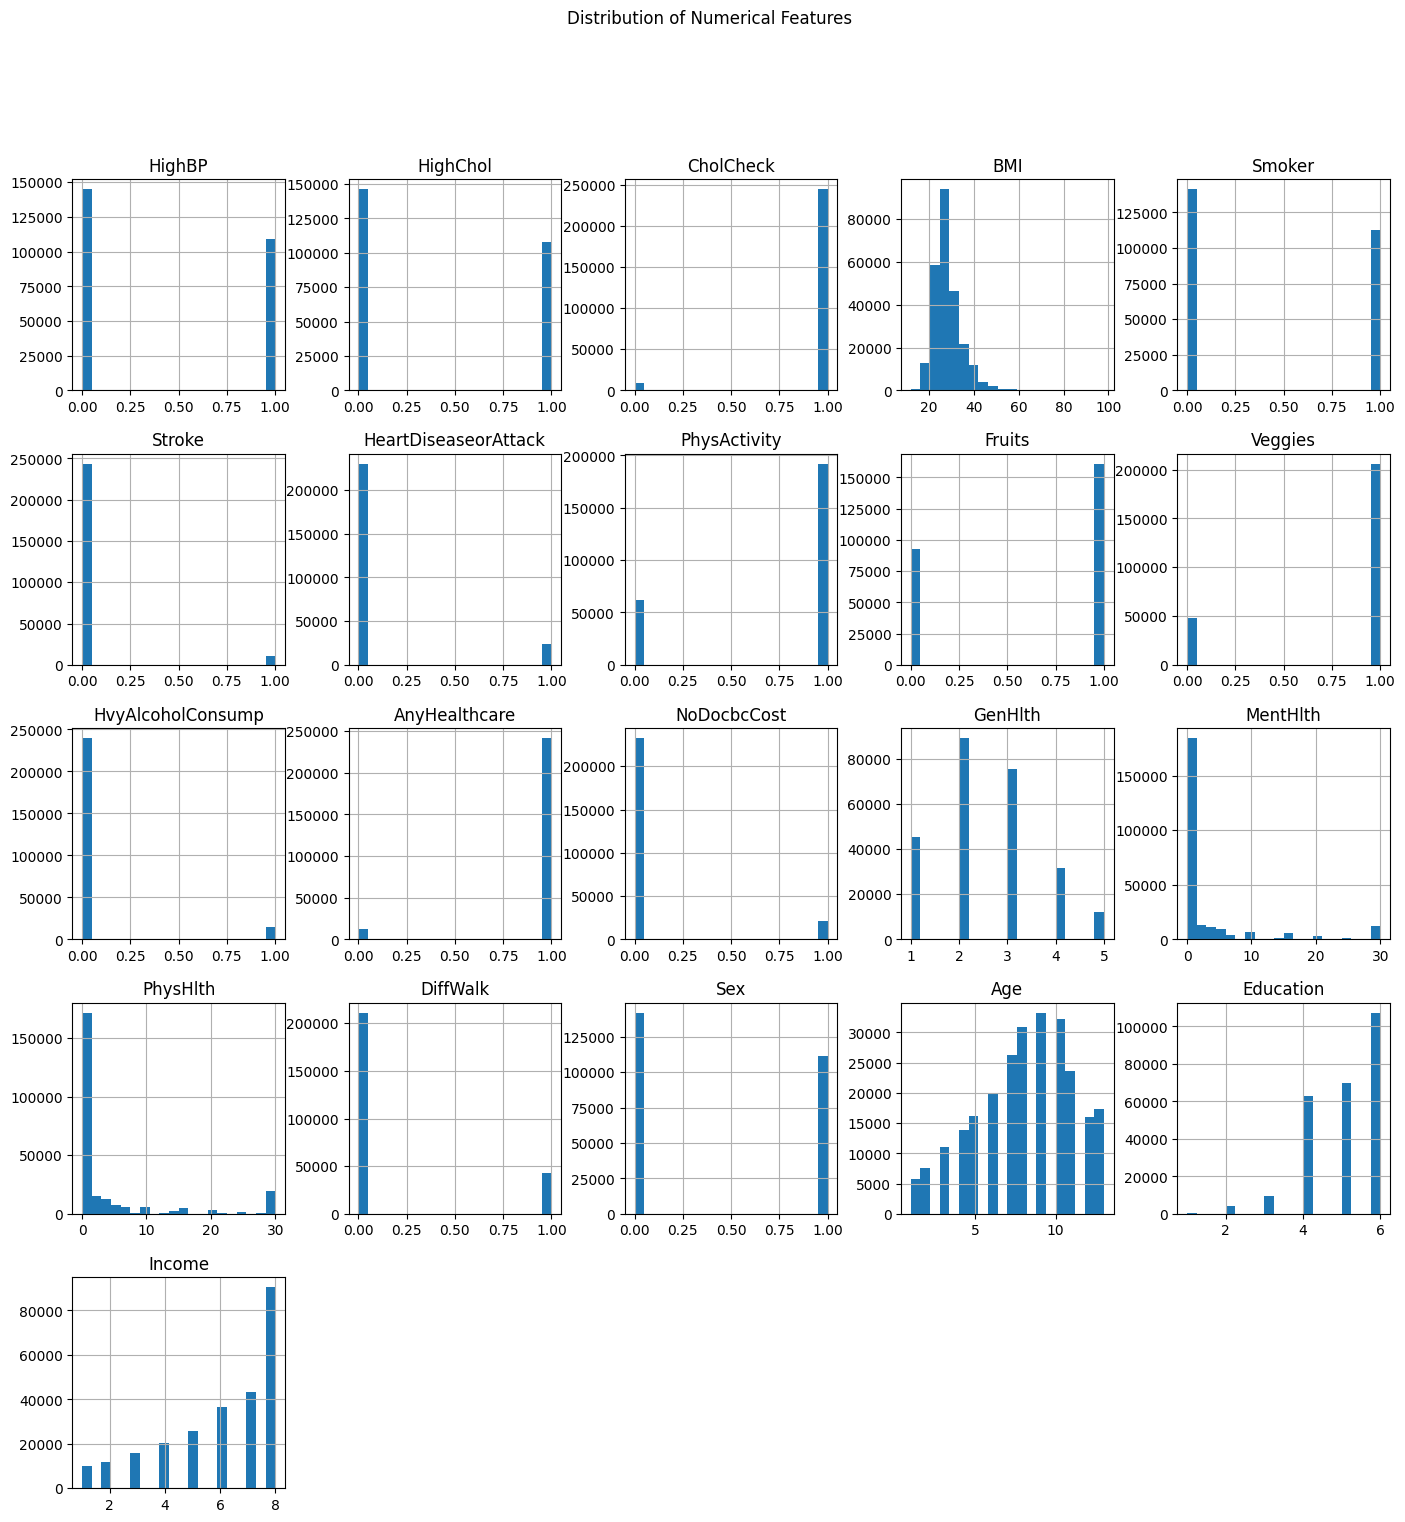

In [ ]:
# Distributions of some of the features
X.hist(bins=20, figsize=(17,17))
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [ ]:
#### Task 2: Implement the models
def logistic(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
## 2.1. Implement logistic regression with gradient descent for Dataset 2.
class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.01, epsilon=1e-4, max_iters=1000, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon #to get the tolerance for the norm of gradients
        self.max_iters = max_iters  #maximum number of iteration of gradient descent
        self.verbose = verbose # for debugging purposes

    def gradient(self, X, y):
      grad = np.dot(X.T, logistic(np.dot(X,self.w)) - y) / X.shape[0]
      return grad # size D

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            self.w = self.w - self.learning_rate * self.gradient(x, y)
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh



In [ ]:
## 2.2. Implement mini-batch stochastic gradient descent for both linear and logistic regression.
class MBSGDLogisticRegression:
  def __init__(self, biased = True, learning_rate = 0.01, max_iters = 1000, epsilon = 1e-8, batch_size = 32, verbose = False, record_history = False):
    """
    Initializes the MBSGDLogisticRegression class with the necessary hyperparameters.

    Parameters:
    -----------
    biased : bool, optional (default=True)
        Whether or not to include a bias term in the model.
    learning_rate : float, optional (default=0.01)
        The step size for gradient descent.
    max_iters : int, optional (default=10000)
        The maximum number of iterations to run gradient descent.
    epsilon : float, optional (default=1e-8)
        The threshold for the norm of the gradient to determine convergence.
    batch_size : int, optional (default=32)
        The number of samples to use in each mini-batch during gradient descent.
    verbose : bool, optional (default=False)
        If True, print the progress and final results during training.
    record_history : bool, optional (default=False)
        If True, record the weight history at each step of the gradient descent.
    """
    self.biased = biased
    self.learning_rate = learning_rate
    self.epsilon = epsilon
    self.max_iters = max_iters
    self.batch_size = batch_size
    self.verbose = verbose
    self.record_history = record_history
    if record_history:
      self.weight_history = []  # List to store weight history for visualizaiton purposes

  def gradient(self, X, y):
    """
    Computes the gradient of the logistic cost function with respect to the weights.

    Parameters:
    -----------
    X : numpy array
        Input feature matrix.
    y : numpy array
        True target values.
    w : numpy array
        Current weights of the model.

    Returns:
    --------
    grad : numpy array
        The gradient of the logistic loss function with respect to weights.
    """
    grad = np.dot(X.T, logistic(np.dot(X,self.w)) - y) / X.shape[0]
    return grad

  def run(self, X, y):
    """
    Executes mini-batch stochastic gradient descent to minimize the cost function.

    Parameters:
    -----------
    X : numpy array
        Input feature matrix.
    y : numpy array
        True target values.
    w : numpy array
        Initial weights of the model.

    Returns:
    --------
    w : numpy array
        Optimized weights after running mini-batch gradient descent.
    """
    N = X.shape[0]
    grad = np.inf # Initialize gradient as infinity for the loop
    t = 0 # Initialize iteration counter

    while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
      # Stochastic step to obtain mini-batch

      indices = np.random.choice(N, self.batch_size, replace = False)
      X_batch = X[indices]
      y_batch = y[indices]
      self.w = self.w - self.learning_rate * self.gradient(X_batch, y_batch) # walk down the gradient and update weight
      if self.record_history:
        self.weight_history.append(self.w.copy()) # update history

      t += 1
    if self.verbose:
      print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(grad)}')
      print(f'the weight found: {self.w}')

  def fit(self, X, y):
    """
    Fits the logistic regression model to the training data using class's in built gradient descent.

    Parameters:
    -----------
    X : numpy array
        The input feature matrix.
    y : numpy array
        The target vector.

    Returns:
    --------
    self : object
        The fitted model.
    """
    if X.ndim == 1: # Treats one dimensional case into vector
      X = X[:, None]
    N,D = X.shape # N = number of samples taken, D = dimension of data
    if self.biased:
      X = np.column_stack([np.ones(N), X]) # Addes bias 1s
    N,D = X.shape
    # gradient descent
    self.w = np.zeros(D) # inital weights
    self.run(X, y)
    return self

  def predict(self, X):
    """
    Predicts the probabilities for the input data using the trained model.

    Parameters:
    -----------
    X : numpy array
        Input feature matrix.

    Returns:
    --------
    y_hat : numpy array
        Predicted probabilities for each sample.
    """
    if X.ndim == 1:
      X = X[:, None]
    if self.biased:
      N = X.shape[0]
      X = np.column_stack([np.ones(N), X])
    y_hat = logistic(X @ self.w)
    return y_hat


In [ ]:
#### Task 3: Run experiments

In [ ]:
## 1. Report the performance of fully batched logistic regression. Use a 80−20 train/test split and report the performance on both training set and test set.
# Create a random number generator
random_seed_generator = np.random.default_rng()

# Generate a random seed, randomize dataset
seed = random_seed_generator.integers(0, 2**32 - 1)  # Generates a random integer seed
X_prepared_rand = X_prepared.copy()
X_prepared_rand = X_prepared_rand.sample(frac=1, random_state=seed).reset_index(drop=True)
Y_prepared_rand = y.copy()
Y_prepared_rand = Y_prepared_rand.sample(frac=1, random_state=seed).reset_index(drop=True)


In [ ]:
def split_and_predict(percentage, model_num, to_print = True, threshold_percentage = 0.2, rate_of_learning = 0.01, batches = 32, max_iterations = 1000):
  """
    Splits the dataset

    Important Parameters:
    -----------
    percentage : float
        split percentage
    various hyperparameters as outlined in class
    rate_of_learning : float
    batches : int
    max_iterations : int
    Returns:
    --------
    list of performance measures
    """

  # Compute the index for the split
  split = int(percentage * len(X_prepared_rand))
  # Split the DataFrame
  train_X = X_prepared_rand[:split]
  test_X = X_prepared_rand[split:]
  train_Y = Y_prepared_rand[:split]
  test_Y = Y_prepared_rand[split:]
  # Convert to numpy arrays
  np_train_X = train_X.to_numpy(dtype='int')
  np_test_X = test_X.to_numpy(dtype='int')
  np_train_Y = train_Y.to_numpy(dtype='int')
  np_test_Y = test_Y.to_numpy(dtype='int')

  if (model_num == 1):
    # Gradient Descent Logistic
    model = LogisticRegression(max_iters = max_iterations)
    weights = model.fit(np_train_X,np_train_Y)
    y_hat = model.predict(np_train_X)
    y_hat_test = model.predict(np_test_X)

  elif (model_num == 2):
    model = MBSGDLogisticRegression(learning_rate = rate_of_learning, max_iters = max_iterations, batch_size = batches)
    weights = model.fit(np_train_X,np_train_Y)
    y_hat = model.predict(np_train_X)
    y_hat_test = model.predict(np_test_X)

  else:
    return -1

  threshold = threshold_percentage
  y_hat_labels = np.where(y_hat >= threshold, 1, 0)
  y_hat_test_labels = np.where(y_hat_test >= threshold, 1, 0)

  # Confusion Matrix for y_train
  cm = confusion_matrix(np_train_Y, y_hat_labels)

  # Confusion Matrix for y_test
  cm2 = confusion_matrix(np_test_Y, y_hat_test_labels)

  # Accuracy
  accuracy = accuracy_score(np_test_Y, y_hat_test_labels)

  # Precision
  precision = precision_score(np_test_Y, y_hat_test_labels, zero_division=1)

  # Recall
  recall = recall_score(np_test_Y, y_hat_test_labels)

  # F1-Score
  f1 = f1_score(np_test_Y, y_hat_test_labels)

  if to_print:

    print("Confusion Matrix for Training Set :")
    print(cm)

    print("Confusion Matrix for Test Set:")
    print(cm2)

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')

    precision, recall, thresholds = precision_recall_curve(np_test_Y, y_hat_test_labels)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

  return [accuracy, precision, recall, f1, weights.w]

Confusion Matrix for Training Set :
[[140607  34059]
 [ 13942  14336]]
Confusion Matrix for Test Set:
[[35105  8563]
 [ 3477  3591]]
Accuracy: 0.76
Precision: 0.30
Recall: 0.51
F1-Score: 0.37


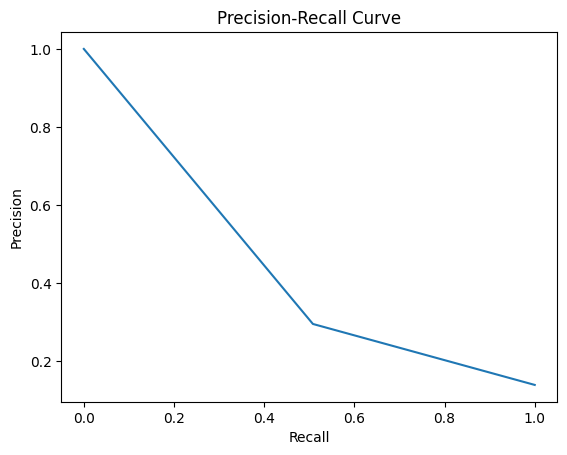

In [ ]:
# Regular Gradient Descent
weights1 = split_and_predict(0.8, 1)[-1]

Confusion Matrix for Training Set :
[[128925  45741]
 [ 10981  17297]]
Confusion Matrix for Test Set:
[[32152 11516]
 [ 2745  4323]]
Accuracy: 0.72
Precision: 0.27
Recall: 0.61
F1-Score: 0.38


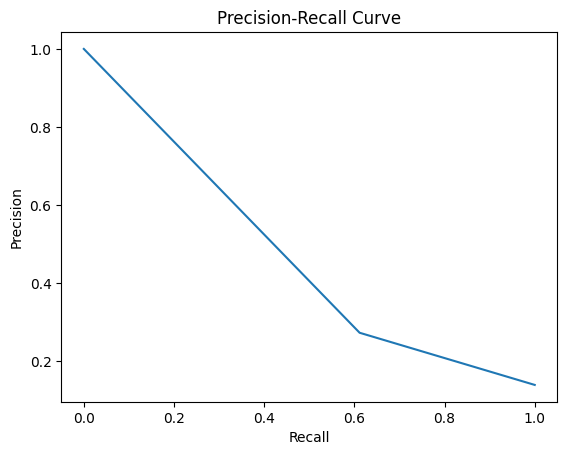

In [ ]:
# Mini Batch Stochastic Gradient Descent
weights2 = split_and_predict(0.8, 2)[-1]

In [ ]:
## 2. Report the weights of each of features in your trained models and discuss how each feature could affect the performance of the models.
print(weights1)
print(weights2)

[ 0.22626103  0.1722494  -0.0773053   0.01537909 -0.03265845  0.02675848
  0.08954621 -0.12558826 -0.07644672 -0.09316474 -0.03666235 -0.07710469
 -0.02846552  0.14514541 -0.01085366  0.01109031  0.07437662  0.03406635
  0.0397534  -0.35701885 -0.16871032 -0.12062274]
[-0.11785397  0.23233928  0.17819086 -0.07230903  0.02572632 -0.02132618
  0.01963567  0.10515331 -0.12183624 -0.06738523 -0.08958001 -0.04064579
 -0.07728508 -0.02988386  0.14472991 -0.01956144  0.00771828  0.07665708
  0.04207918  0.04912401 -0.36167754 -0.19124095]


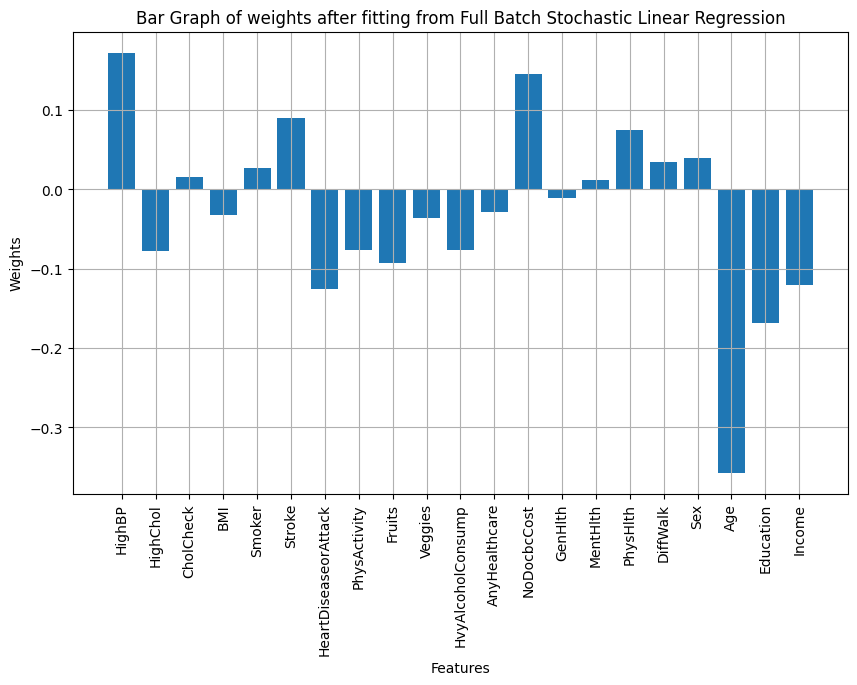

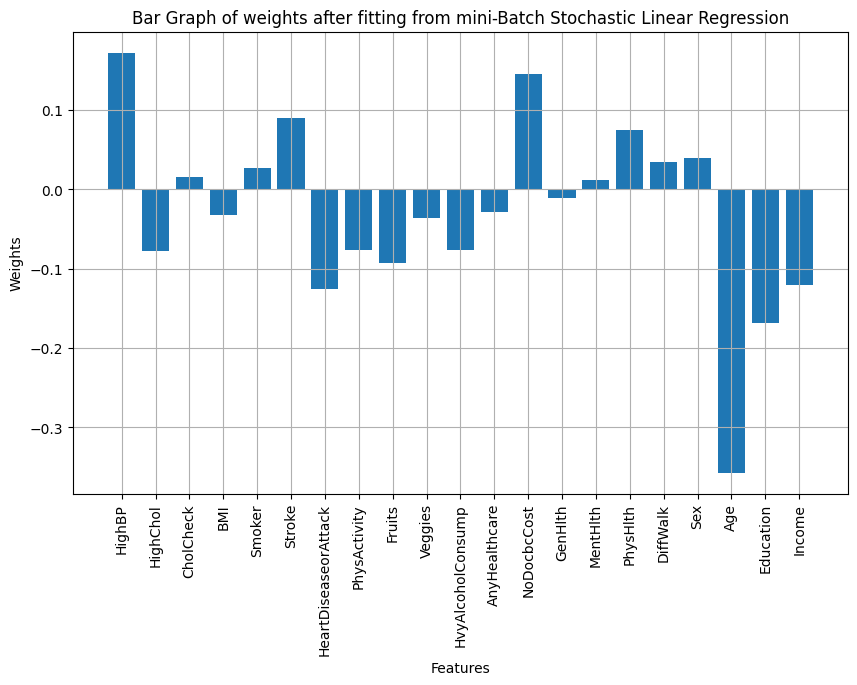

In [ ]:
# Create the bar graph
column_titles = X_prepared.columns
plt.figure(figsize=(10, 6))
plt.bar(column_titles, weights1[1:])

plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Weights')
plt.title('Bar Graph of weights after fitting from Full Batch Stochastic Linear Regression')
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(column_titles, weights1[1:])
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Weights')
plt.title('Bar Graph of weights after fitting from mini-Batch Stochastic Linear Regression')
plt.grid()
plt.show()

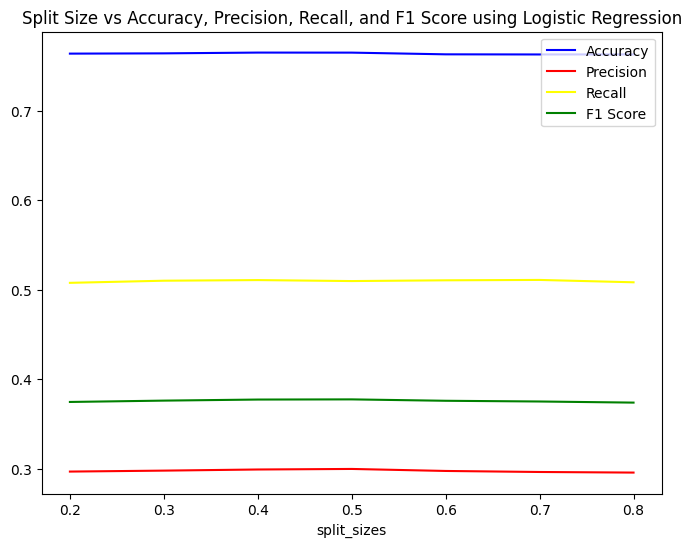

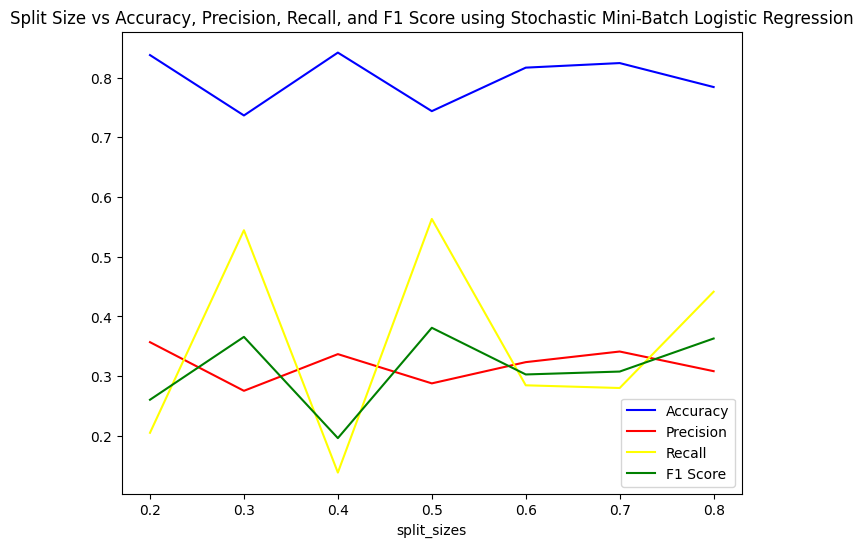

In [ ]:
## 3. Sample growing subsets of the training data (20%,30%,...80%). Observe and explain how does size of training data affects the performance for both models.
## Plot two curves as a function of training size, one for performance in train and one for test.
fully_data = [[], [], [], []]
mini_data = [[], [], [], []]
split_sizes = []

for i in range(2, 9, 1):
  temp = i / 10
  data1 = split_and_predict(temp, 1, False)[0:4]
  data2 = split_and_predict(temp, 2, False)[0:4]

  for j in range(4):
    fully_data[j].append(data1[j])
    mini_data[j].append(data2[j])

  split_sizes.append(i / 10)

def plot_split_accuracy(data, reg_or_minibatch):
  """
  function plots results from split size experiments
  """
  plt.figure(figsize=(8, 6))

    # Plotting the Graph
  plt.plot(split_sizes, data[0], label='Accuracy', color='blue')
  plt.plot(split_sizes, data[1], label='Precision', color='red')
  plt.plot(split_sizes, data[2], label='Recall', color='yellow')
  plt.plot(split_sizes, data[3], label='F1 Score', color='green')
  plt.xlabel('split_sizes')
  plt.legend()

  if reg_or_minibatch:
    plt.title("Split Size vs Accuracy, Precision, Recall, and F1 Score using Stochastic Mini-Batch Logistic Regression")

  else:
    plt.title("Split Size vs Accuracy, Precision, Recall, and F1 Score using Logistic Regression")

    plt.show()

plot_split_accuracy(fully_data, 0)
plot_split_accuracy(mini_data, 1)

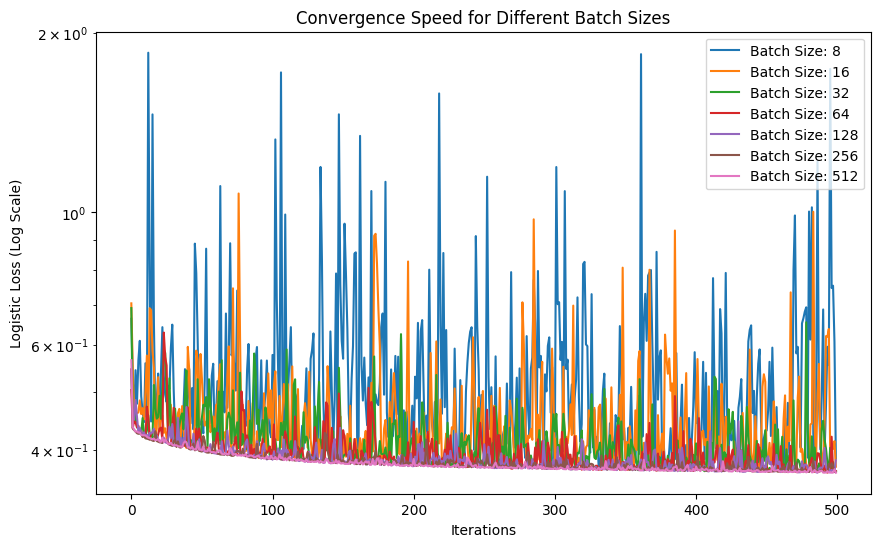

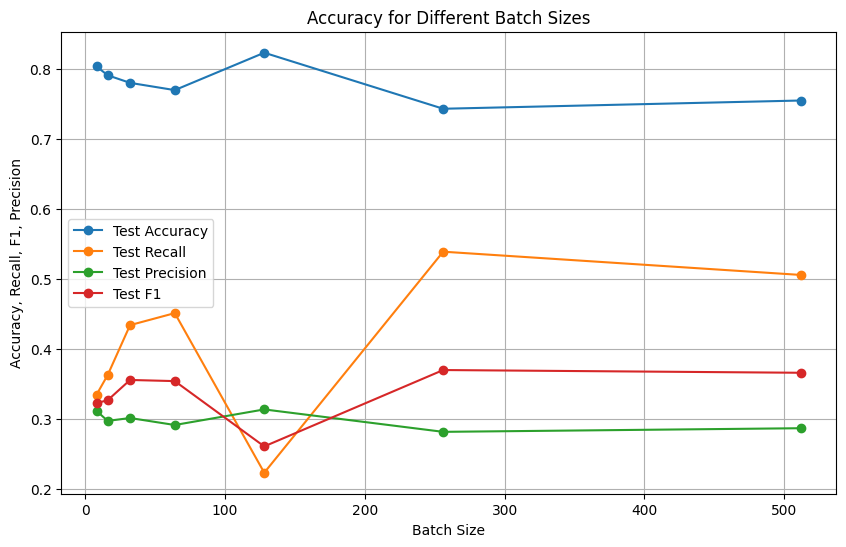

In [ ]:
## 4. For both linear and logistic regression, try out growing minibatch sizes, e.g., 8, 16, 32, 64, and 128.
##    Compare the convergence speed and final performance of different batch sizes to the fully batched baseline.
##    Which configuration works the best among the ones you tried?


### SPLITING THE DATA SET
# Create a random number generator
random_seed_generator = np.random.default_rng()

# Generate a random seed
seed = random_seed_generator.integers(0, 2**32 - 1)  # Generates a random integer seed

# Copy the original datasets before shuffling
X_prepared_stoc = X_prepared.copy()
Y_prepared_stoc = y.copy()

# Shuffle the dataset using the generated seed
X_prepared_stoc = X_prepared.sample(frac=1, random_state=seed).reset_index(drop=True)
Y_prepared_stoc = y.sample(frac=1, random_state=seed).reset_index(drop=True)

# Compute the index for the split (80% for training, 20% for testing)
split = int(0.8 * len(X_prepared_stoc))

# Split the DataFrame into training and testing sets
train_X_stoch = X_prepared_stoc[:split]
test_X_stoch = X_prepared_stoc[split:]
train_Y_stoch = Y_prepared_stoc[:split]
test_Y_stoch = Y_prepared_stoc[split:]

# Convert to NumPy arrays
np_stoch_train_X = train_X_stoch.to_numpy(dtype='int')
np_stoch_test_X = test_X_stoch.to_numpy(dtype='int')
np_stoch_train_Y = train_Y_stoch.to_numpy(dtype='int')
np_stoch_test_Y = test_Y_stoch.to_numpy(dtype='int')

batch_sizes = [8, 16, 32, 64, 128, 256, 512] # 2048, 4096, 8192, 16384]
convergence_info = {}



def calculate_loss(X, y_true, weights):
    # Number of training examples
    m = len(y_true)

    # Compute the predicted probabilities (y_hat) using the logistic (sigmoid) function
    y_pred = logistic(np.dot(X, weights))

    # Clip predicted probabilities to avoid log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Compute the binary cross-entropy loss
    loss = -(1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    return loss

X_with_bias = np.column_stack([np.ones(np_stoch_train_X.shape[0]), np_stoch_train_X])

#recording the weight history
for batch_size in batch_sizes:
  model = MBSGDLogisticRegression(batch_size = batch_size, record_history = True, max_iters = 500, learning_rate = 0.01)
  model.fit(np_stoch_train_X, np_stoch_train_Y)
  history = []
  for weights in model.weight_history:
    loss = calculate_loss(X_with_bias, np_stoch_train_Y, weights)
    history.append(loss)

  y_train_pred_stoch = model.predict(np_stoch_train_X)
  y_test_pred_stoch = model.predict(np_stoch_test_X)

  #descion making and preformance measures
  threshold = 0.2
  y_hat_test_labels = np.where(y_test_pred_stoch >= threshold, 1, 0)
  accuracy = accuracy_score(np_stoch_test_Y, y_hat_test_labels)
  recall = recall_score(np_stoch_test_Y, y_hat_test_labels)
  precision = precision_score(np_stoch_test_Y, y_hat_test_labels, zero_division=1)
  f1 = f1_score(np_stoch_test_Y, y_hat_test_labels)

  convergence_info[batch_size] = {
    'accuracy' : accuracy,
    'recall' : recall,
    'precision' : precision,
    'f1' : f1,
    'history': history  # Store the loss per epoch for convergence analysis
  }
# plotting convergence
plt.figure(figsize=(10, 6))
for batch_size, info in convergence_info.items():
    plt.plot(info['history'], label=f'Batch Size: {batch_size}')
plt.title('Convergence Speed for Different Batch Sizes')
plt.xlabel('Iterations')
plt.ylabel('Logistic Loss (Log Scale)')
plt.yscale('log')  # Set y-axis to log scale
plt.legend()
plt.show()


# Plotting the preformance values for different batch sizes
plt.figure(figsize=(10, 6))
accuracy_values = [convergence_info[batch_size]['accuracy'] for batch_size in batch_sizes]
recall_values = [convergence_info[batch_size]['recall'] for batch_size in batch_sizes]
precision_values = [convergence_info[batch_size]['precision'] for batch_size in batch_sizes]
f1_values = [convergence_info[batch_size]['f1'] for batch_size in batch_sizes]
plt.plot(batch_sizes, accuracy_values, label='Test Accuracy', marker='o')
plt.plot(batch_sizes, recall_values, label='Test Recall', marker='o')
plt.plot(batch_sizes, precision_values, label='Test Precision', marker='o')
plt.plot(batch_sizes, f1_values, label='Test F1', marker='o')
plt.title('Accuracy for Different Batch Sizes')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy, Recall, F1, Precision')
plt.legend()
plt.grid(True)
plt.show()

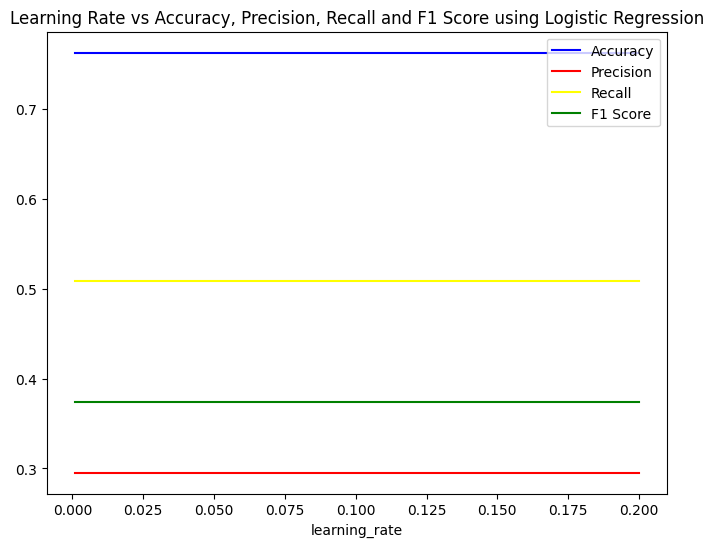

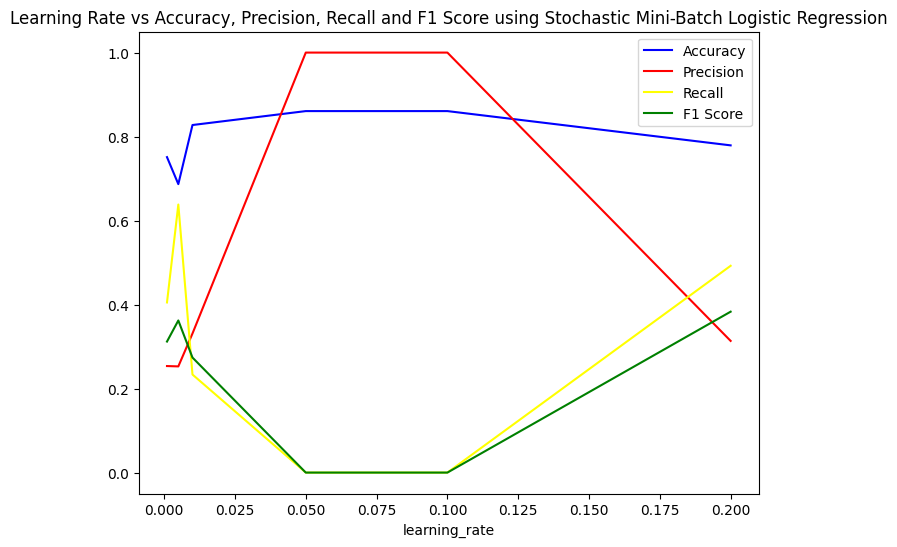

In [ ]:
## 5. Present the performance of logistic regression with at least three different learning rates (your own choice).

learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
fully_data = [[], [], [], []]
mini_data = [[], [], [], []]

for learning_rate_value in learning_rates:

  data1 = split_and_predict(0.8, 1, False, 0.2, learning_rate_value)[0:4]
  data2 = split_and_predict(0.8, 2, False, 0.2, learning_rate_value)[0:4]

  for j in range(4):
    fully_data[j].append(data1[j])
    mini_data[j].append(data2[j])

def plot_learning_rate_accuracy(data, reg_or_minibatch):
    plt.figure(figsize=(8, 6))

    X_Y_Spline_acc = make_interp_spline(learning_rates, data[0])
    X_Y_Spline_pres = make_interp_spline(learning_rates, data[1])
    X_Y_Spline_rec = make_interp_spline(learning_rates, data[2])
    X_Y_Spline_f1 = make_interp_spline(learning_rates, data[3])
    # Returns evenly spaced numbers over a specified interval.
    X_ = np.linspace(learning_rates[0], learning_rates[-1], 500)
    Y_acc = X_Y_Spline_acc(X_)
    Y_pres = X_Y_Spline_pres(X_)
    Y_rec = X_Y_Spline_rec(X_)
    Y_f1 = X_Y_Spline_f1(X_)

    # Plotting the Graph
    plt.plot(learning_rates, data[0], label='Accuracy', color='blue')
    plt.plot(learning_rates, data[1], label='Precision', color='red')
    plt.plot(learning_rates, data[2], label='Recall', color='yellow')
    plt.plot(learning_rates, data[3], label='F1 Score', color='green')
    plt.xlabel('learning_rate')
    plt.legend()

    if reg_or_minibatch:
      plt.title('Learning Rate vs Accuracy, Precision, Recall and F1 Score using Stochastic Mini-Batch Logistic Regression')

    else:
      plt.title('Learning Rate vs Accuracy, Precision, Recall and F1 Score using Logistic Regression')

    plt.show()

plot_learning_rate_accuracy(fully_data, 0)
plot_learning_rate_accuracy(mini_data, 1)

In [ ]:
# Mini batch stochastic gradient descent implemented with momentum/velocity to reduce noise
class MBSGDLogisticRegressionMomentum:
  def __init__(self, biased = True, learning_rate = 0.01, max_iters = 1000, epsilon = 1e-8, batch_size = 32, momentum = 0.5, verbose = False, record_history = False):
    self.biased = biased
    self.learning_rate = learning_rate
    self.epsilon = epsilon
    self.max_iters = max_iters
    self.batch_size = batch_size
    self.momentum = momentum
    self.velocity = None  # This will hold the velocity (momentum)
    self.verbose = verbose
    self.record_history = record_history
    if record_history:
      self.weight_history = []  # List to store weight history for visualizaiton purposes

  def gradient(self, X, y):
    grad = np.dot(X.T, logistic(np.dot(X,self.w)) - y) / X.shape[0]
    return grad

  def run(self, X, y):
    N = X.shape[0]
    grad = np.inf # Initialize gradient as infinity for the loop
    t = 0 # Initialize iteration counter
    velocity = np.zeros_like(self.w)
    while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
      # Stochastic step to obtain mini-batch

      indices = np.random.choice(N, self.batch_size, replace = False)
      X_batch = X[indices]
      y_batch = y[indices]
      grad = self.gradient(X_batch, y_batch)
      velocity = (self.momentum) * velocity + self.learning_rate * grad # update velocity
      self.w = self.w - velocity  # walk down the gradient and update weight with velocity
      if self.record_history:
        self.weight_history.append(self.w.copy()) # update history
      t += 1
    if self.verbose:
      print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(grad)}')
      print(f'the weight found: {self.w}')

  def fit(self, X, y):
    if X.ndim == 1: # Treats one dimensional case into vector
      X = X[:, None]
    N,D = X.shape # N = number of samples taken, D = dimension of data
    if self.biased:
      X = np.column_stack([np.ones(N), X]) # Addes bias 1s
    N,D = X.shape
    # gradient descent
    self.w = np.zeros(D) # inital weights
    self.run(X, y)
    return self

  def predict(self, X):
    if X.ndim == 1:
      X = X[:, None]
    if self.biased:
      N = X.shape[0]
      X = np.column_stack([np.ones(N), X])
    y_hat = logistic(X @ self.w)
    return y_hat



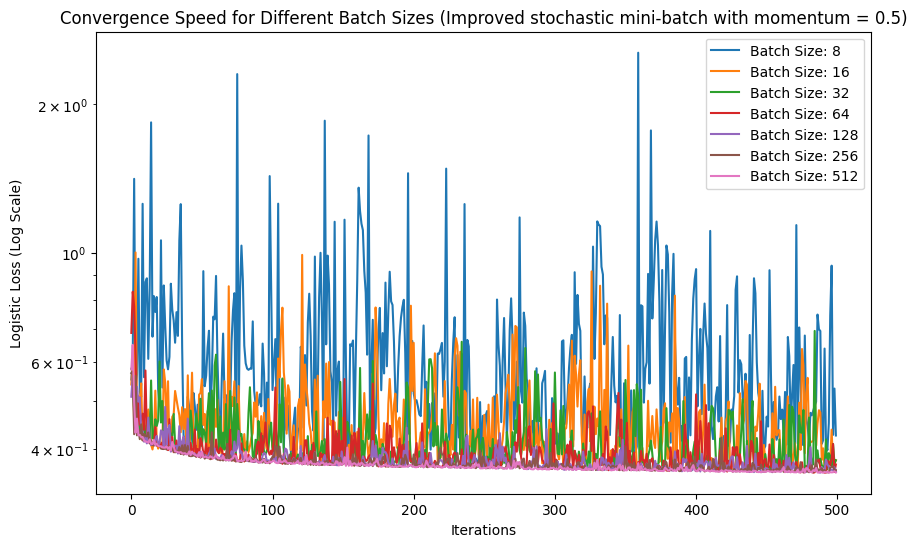

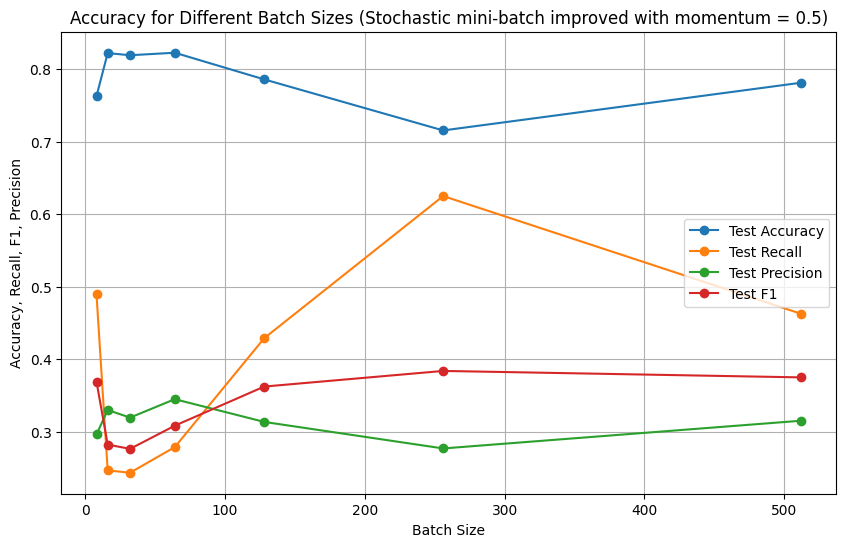

In [ ]:
# Create a random number generator
random_seed_generator = np.random.default_rng()

# Generate a random seed
seed = random_seed_generator.integers(0, 2**32 - 1)  # Generates a random integer seed

# New data set split
X_prepared_stoc = X_prepared.copy()
Y_prepared_stoc = y.copy()

X_prepared_stoc = X_prepared.sample(frac=1, random_state=seed).reset_index(drop=True)
Y_prepared_stoc = y.sample(frac=1, random_state=seed).reset_index(drop=True)

split = int(0.8 * len(X_prepared_stoc))

train_X_stoch = X_prepared_stoc[:split]
test_X_stoch = X_prepared_stoc[split:]
train_Y_stoch = Y_prepared_stoc[:split]
test_Y_stoch = Y_prepared_stoc[split:]

np_stoch_train_X = train_X_stoch.to_numpy(dtype='int')
np_stoch_test_X = test_X_stoch.to_numpy(dtype='int')
np_stoch_train_Y = train_Y_stoch.to_numpy(dtype='int')
np_stoch_test_Y = test_Y_stoch.to_numpy(dtype='int')

batch_sizes = [8, 16, 32, 64, 128, 256, 512] # 2048, 4096, 8192, 16384]
convergence_info = {}


X_with_bias = np.column_stack([np.ones(np_stoch_train_X.shape[0]), np_stoch_train_X])

# recording our weight history
for batch_size in batch_sizes:
  model = MBSGDLogisticRegressionMomentum(batch_size = batch_size, record_history = True, max_iters = 500, learning_rate = 0.01)
  model.fit(np_stoch_train_X, np_stoch_train_Y)
  history = []
  for weights in model.weight_history:
    loss = calculate_loss(X_with_bias, np_stoch_train_Y, weights)
    history.append(loss)

  y_train_pred_stoch = model.predict(np_stoch_train_X)
  y_test_pred_stoch = model.predict(np_stoch_test_X)

  # decision making and performance scores
  threshold = 0.2
  y_hat_test_labels = np.where(y_test_pred_stoch >= threshold, 1, 0)
  accuracy = accuracy_score(np_stoch_test_Y, y_hat_test_labels)
  recall = recall_score(np_stoch_test_Y, y_hat_test_labels)
  precision = precision_score(np_stoch_test_Y, y_hat_test_labels, zero_division=1)
  f1 = f1_score(np_stoch_test_Y, y_hat_test_labels)

  convergence_info[batch_size] = {
    'accuracy' : accuracy,
    'recall' : recall,
    'precision' : precision,
    'f1' : f1,
    'history': history  # Store the loss per epoch for convergence analysis
  }
# plotting convergence
plt.figure(figsize=(10, 6))
for batch_size, info in convergence_info.items():
    plt.plot(info['history'], label=f'Batch Size: {batch_size}')
plt.title('Convergence Speed for Different Batch Sizes (Improved stochastic mini-batch with momentum = 0.5)')
plt.xlabel('Iterations')
plt.ylabel('Logistic Loss (Log Scale)')
plt.yscale('log')  # Set y-axis to log scale
plt.legend()
plt.show()


# Plotting the preformance values for different batch sizes
plt.figure(figsize=(10, 6))
accuracy_values = [convergence_info[batch_size]['accuracy'] for batch_size in batch_sizes]
recall_values = [convergence_info[batch_size]['recall'] for batch_size in batch_sizes]
precision_values = [convergence_info[batch_size]['precision'] for batch_size in batch_sizes]
f1_values = [convergence_info[batch_size]['f1'] for batch_size in batch_sizes]
plt.plot(batch_sizes, accuracy_values, label='Test Accuracy', marker='o')
plt.plot(batch_sizes, recall_values, label='Test Recall', marker='o')
plt.plot(batch_sizes, precision_values, label='Test Precision', marker='o')
plt.plot(batch_sizes, f1_values, label='Test F1', marker='o')
plt.title('Accuracy for Different Batch Sizes (Stochastic mini-batch improved with momentum = 0.5)')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy, Recall, F1, Precision')
plt.legend()
plt.grid(True)
plt.show()